In [74]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [28]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant Village",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [16]:
class_names1 = dataset.class_names
class_names1

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
len(dataset)

68

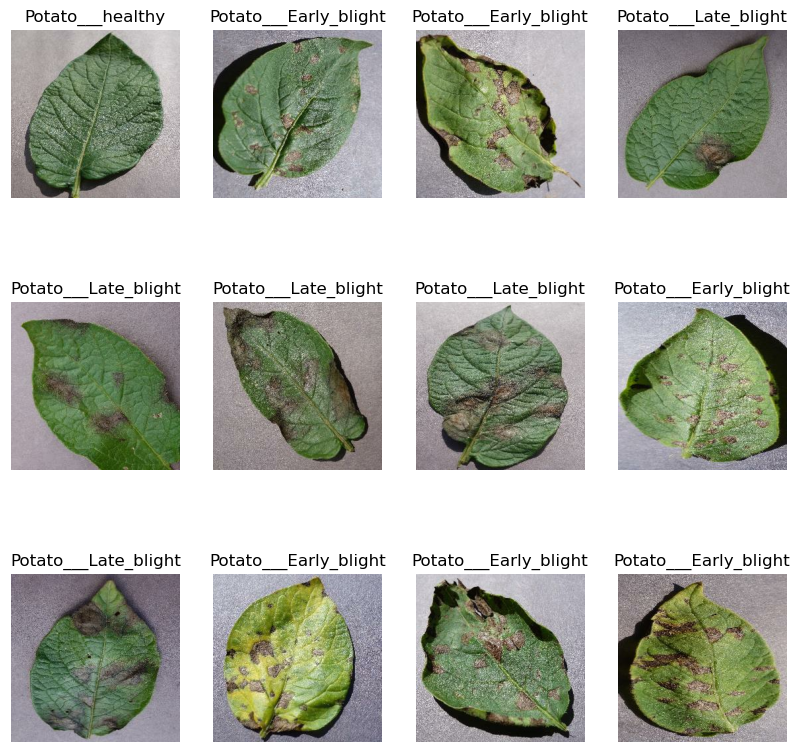

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names1[label_batch[i]])
        plt.axis("off")
    

In [19]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds = dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [11]:
test_ds = test_ds.skip(7)
len(test_ds)

7

In [20]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [45]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu',input_shape =input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_56 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_56 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_57 (MaxPooli  (32, 62, 62, 32)          0         
 ng2D)                                               

In [73]:
# metrics = [TruePositive(name='tp'),FalsePositives(name='fp'),TrueNegatives(name = 'tn'),FalseNegatives(names='fn'),BinaryAccuracy(name='accuracy'),Precision(name='precision'),Recall(name='recall'),AUC(name='auc')]

NameError: name 'TruePositive' is not defined

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    epochs = EPOCHS,
    verbose=1
)

Epoch 1/50

54/54 [==============================] - 62s 943ms/step - loss: 0.8738 - accuracy: 0.5463 - val_loss: 0.7661 - val_accuracy: 0.6875
Epoch 2/50
54/54 [==============================] - 49s 912ms/step - loss: 0.6620 - accuracy: 0.6916 - val_loss: 0.4957 - val_accuracy: 0.8080
Epoch 3/50
54/54 [==============================] - 54s 1s/step - loss: 0.4013 - accuracy: 0.8287 - val_loss: 0.3467 - val_accuracy: 0.8795
Epoch 4/50
54/54 [==============================] - 59s 1s/step - loss: 0.3176 - accuracy: 0.8727 - val_loss: 0.2862 - val_accuracy: 0.8929
Epoch 5/50
54/54 [==============================] - 54s 997ms/step - loss: 0.2796 - accuracy: 0.8825 - val_loss: 0.2532 - val_accuracy: 0.8973
Epoch 6/50
54/54 [==============================] - 56s 1s/step - loss: 0.2163 - accuracy: 0.9184 - val_loss: 0.2501 - val_accuracy: 0.9018
Epoch 7/50
54/54 [==============================] - 55s 1s/step - loss: 0.2384 - accuracy: 0.9149 - val_loss: 0.1885 - val_accuracy: 0.9286
Epoch 8/50

In [49]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 2s 139ms/step - loss: 0.1673 - accuracy: 0.9400


In [50]:
scores

[0.1672881692647934, 0.9399999976158142]

In [68]:
history.params
tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False
)

In [55]:
history.history.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

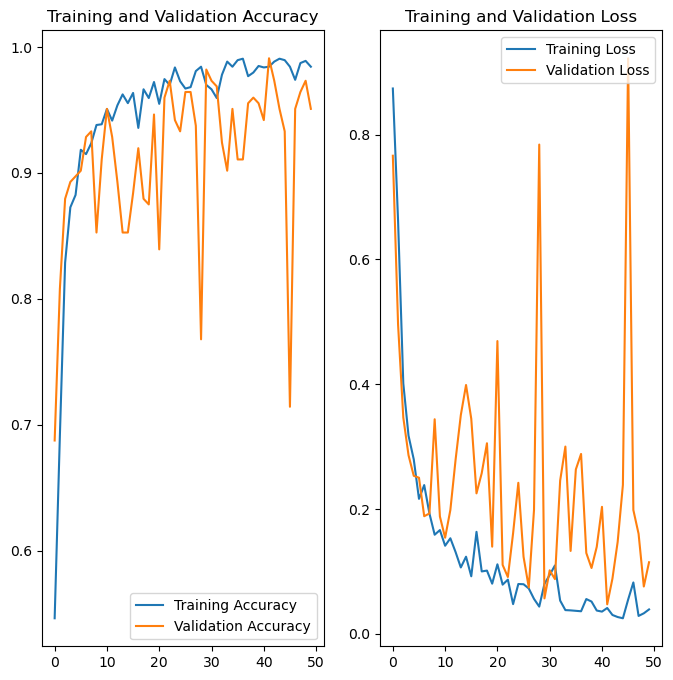

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 406ms/step
predicted label: Potato___Early_blight


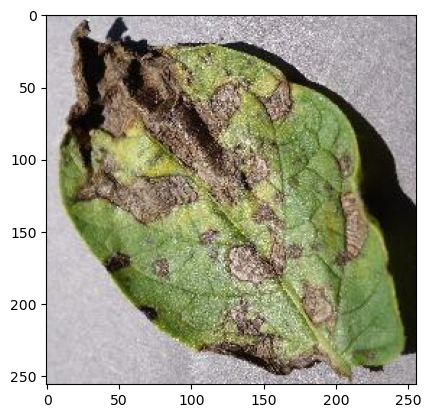

In [58]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names1[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names1[np.argmax(batch_prediction[0])])

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names1[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


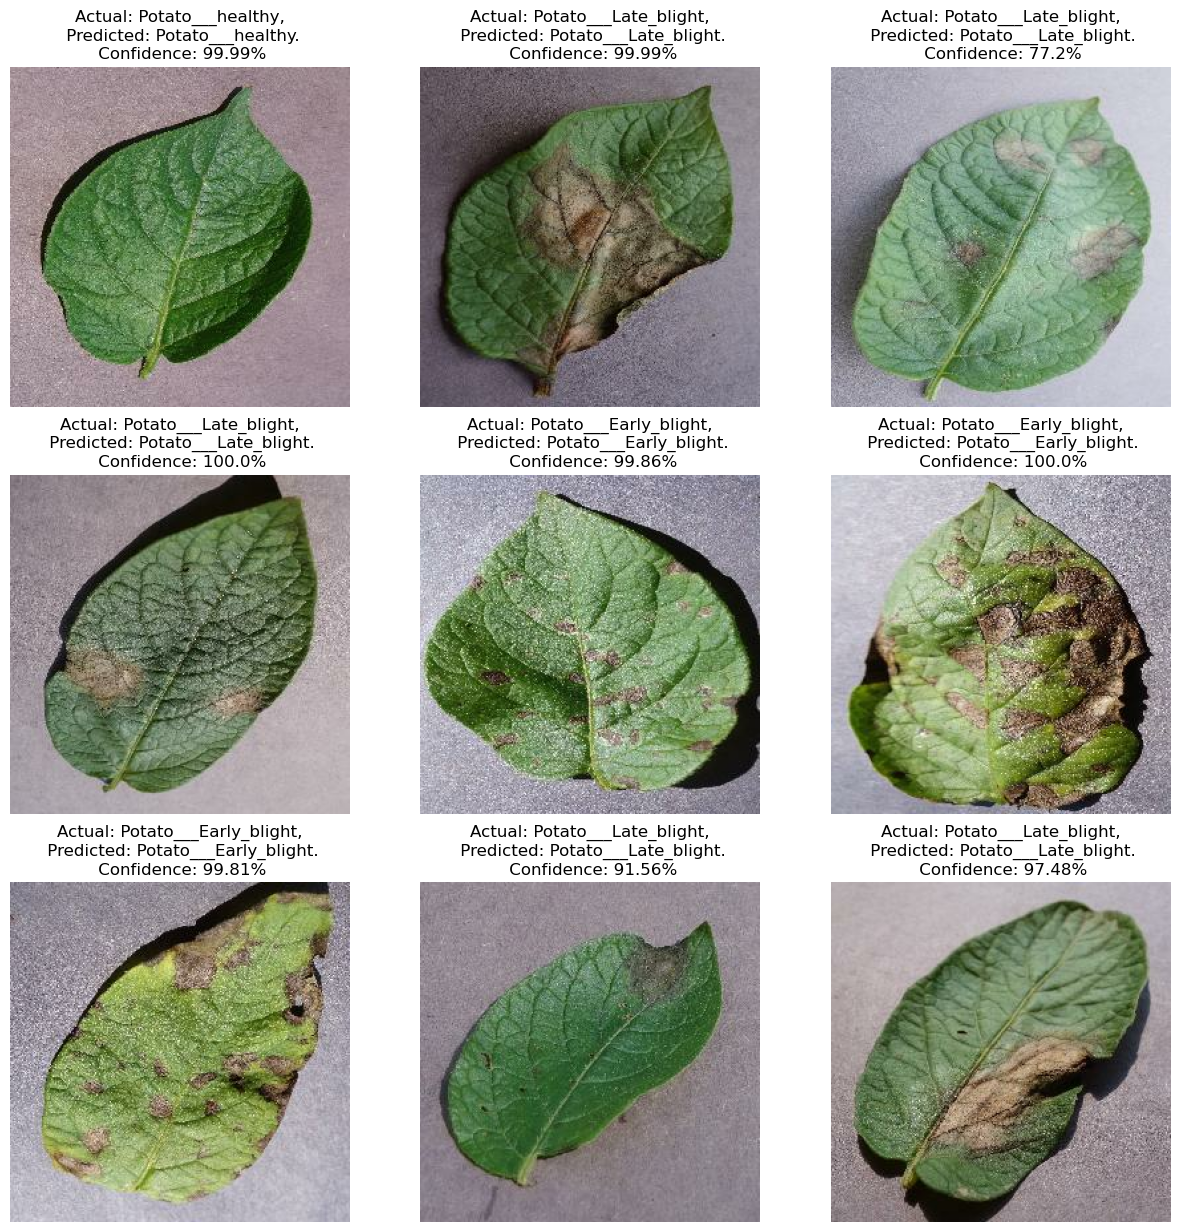

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names1[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [67]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2\assets


INFO:tensorflow:Assets written to: ./models/2\assets
